In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
df =pd.read_csv('Company_Data.csv')

In [15]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,Bad,42,17,Yes,Yes
1,297,111,48,16,260,83,Good,65,10,Yes,Yes
2,267,113,35,10,269,80,Medium,59,12,Yes,Yes
3,158,117,100,4,466,97,Medium,55,14,Yes,Yes
4,37,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,Good,33,14,Yes,Yes
396,114,139,23,3,37,120,Medium,55,11,No,Yes
397,159,162,26,12,368,159,Medium,40,18,Yes,Yes
398,106,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:

label_encoder = preprocessing.LabelEncoder()
df['Sales']= label_encoder.fit_transform(df['Sales']) 

In [65]:
x=df.iloc[:,1:5]
y=df['Sales']

In [66]:
x

,CompPrice,Income,Advertising,Population
0,138,73,11,276
1,111,48,16,260
2,113,35,10,269
3,117,100,4,466
4,141,64,3,340
...,...,...,...,...
395,138,108,17,203
396,139,23,3,37
397,162,26,12,368
398,100,79,7,284


In [67]:
y

0      255
1      297
2      267
3      158
4       37
      ... 
395    320
396    114
397    159
398    106
399    262
Name: Sales, Length: 400, dtype: int64

In [69]:
df['Sales'].unique()

array([255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
       227, 328, 190, 252, 126,  88, 321, 210, 286, 177,  47, 239, 191,
       165, 302,   9, 218, 304, 130, 188,  82,  58,  49, 228, 204,  93,
       253, 162, 318,  60,  35,  79,  70,  52,  90,   1,  24, 232, 233,
       132, 135, 110, 242, 209, 226, 169, 156, 141, 303, 142, 196, 229,
       245, 298, 127,  64,  48, 205, 257, 172,  28, 125,  74, 274, 316,
       111, 128, 161,   3, 237,  31, 282, 168, 300, 280, 289, 174, 105,
       143, 178, 163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137,
       153, 235, 120,   0, 167,  94, 279, 287, 182,  62, 160,  56,  81,
       263, 268, 216, 193, 313, 225, 326, 152,  40,  34,  11,  2

In [71]:
df.Sales.value_counts()

183    4
142    3
243    3
117    3
135    3
      ..
221    1
222    1
224    1
225    1
0      1
Name: Sales, Length: 336, dtype: int64

In [72]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [73]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=5)

In [74]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

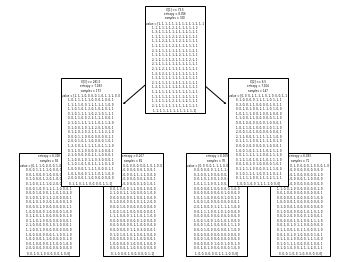

In [75]:
#PLot the decision tree
tree.plot_tree(model);


In [77]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

243    27
58     25
34     18
184    10
dtype: int64

In [78]:
preds

array([ 58,  58, 243, 243, 184,  34,  34, 243,  34,  34, 184,  58,  58,
       184, 184, 243,  58, 243,  58, 184,  58, 243,  58,  58, 243,  58,
        58,  34, 243,  34,  34, 184,  34,  58, 243, 184,  58, 243,  58,
        34, 184,  34, 243, 243, 243,  58,  58, 243,  34,  34,  58,  58,
        58, 243,  34,  58,  34, 243,  34, 243, 243,  58,  58, 184, 243,
       243,  34, 184, 243, 243, 243, 243,  34, 243, 243,  58,  58,  34,
        58, 243], dtype=int64)

In [79]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,34,58,184,243
Sales,,,,
5,0,0,0,1
6,0,1,0,0
15,0,1,0,0
22,0,0,0,1
32,0,0,0,1
...,...,...,...,...
311,0,1,0,0
314,0,1,0,0
316,0,0,0,1


In [80]:
# Accuracy 
np.mean(preds==y_test)

0.0

# Building Decision Tree Classifier (CART) using Gini Criteria


In [81]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [82]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [83]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.0